In [1]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pylab as plt

# Hledání kořenů funkce $f(x)$ 
Hledáme řešení rovnice $f(x) = 0$ na intervalu $[a,b]$

## Metoda bisekce

## Předpoklady metody

1. Musí existovat hodnoty $a$ a $b$ takové, $F(a)F(b)<0$ a bod $x \in [a,b]$, kde $F(x)=0$
 <img src="Bisection_method.svg.png" alt="Bisekce" align="right"> 

2. Tolerance hledaného řešení $x_{\rm bisection}$

$$
f(x_{\rm bisection}) \leq \varepsilon
$$

### Algoritmus metody
 
 Hledáme nulový bod na intervalu $<a,b>$, který splňuje výše uvedené předpoklady
 

 0. Počáteční nastavení hraničních bodu $a_i = a$, $b_i =b$ pro $i = 0$
 0. Z hraničních bodů intervalu spočítej střední bod vztahem
 
 $$
 c_i = a_i + \frac{b_i-a_i}{2}
 $$
 0. Pokud $f(c_i) < \varepsilon$, pak je $c_i$ odhad hledaného nulového bodu
 0. V opačném případě pokračuj v hledání
 0. Pokud $f(c_i)f(a_i)>0$, pak nové hraniční body jsou $a_i = c_i$, $b_i = b_i$
 0. Pokud $f(c_i)f(a_i)<0$, pak nové hraniční body jsou $a_i = a_i$, $b_i = c_i$
 0. Opakuj kroky od 2.

In [2]:
def fce(x):
    return x**3.0-2.0
 
def Bisection( f, a, b, Nmax ):
    root = False
    epsilon = 0.000001
    #verifying the assumption, f(a).f(b) < 0. step 1.
    if f(a)*f(b)>0:
        print "Error, f(a) and f(b) should have opposite signs"
        return False
    
    #Assigning the initial interval border points - step 2.
    ai = a
    bi = b
    #Iterations
    n = 1
    while (not(root) and n<=Nmax):
        #Bisection , middle point step 3.
        c = (ai+bi)/2.0  
        #Condition step 4.
        if (abs(f(c)) < epsilon):
            root = True
        if f(c)*f(ai)>0:
            ai = c
        #Condition B
        elif f(c)*f(ai)<0:
            bi = c
        #Condition C: repeat the cycle
        n+=1
    #Final result
    return c

In [3]:
x = Bisection(fce,0,2,1000)
print 'Root estimate: ',x," with tolerance: ",fce(x)

Root estimate:  1.25992107391  with tolerance:  1.14381935923e-07


V nebeské mechanice při řešení problému dvou těles narazíme záhy na problém řešení Keplerovy rovnice,
<img src="anomalies.PNG" alt="Bisekce" width="200" height="100" align="right">
$$
M = E - e \sin{E}
$$
která je svou povahou transcendentní. Tato rovnice dává do vzájemné souvislosti vztah mezi střední anomálií $M$, excentrickou anomálii $E$ a excentricitu dráhy $e$. Střední anomálie je dána vztahem
$$
M = \sqrt{\frac{GM}{a^3}}t
$$

Souřadnice obíhajícího tělesa jako funkci času dostaneme ze vztahu
$$
x(t) = a(\cos(E) - \epsilon) \\
y(t) = b \sin{E},
$$
kde $b = a\sqrt{1-\epsilon^2}$ je vedlejší poloosa. Implicitní časová závislost excentrické anomálie najdeme řešením Keplerovy rovnice.

** Problém **
Satelit obíhá Zemi kolem rovníku po trajektorii s excentricitou $e = 0.5$ po geostacionární dráze s velikostí hlavní poloosy $ a = 35 900 $ km. Určete souřadnice x,y satelitu v 15 minutových intervalech po dobu 5 hodin.

In 0.000000 hours, the satellite is located at (17950.000000,0.000000) km
In 0.250000 hours, the satellite is located at (17454.741451,5146.427117) km
In 0.500000 hours, the satellite is located at (16033.116538,10023.389785) km
In 0.750000 hours, the satellite is located at (13848.839530,14430.275583) km
In 1.000000 hours, the satellite is located at (11104.366685,18261.717674) km
In 1.250000 hours, the satellite is located at (7989.453797,21493.395556) km
In 1.500000 hours, the satellite is located at (4657.134058,24151.513767) km
In 1.750000 hours, the satellite is located at (1221.055181,26286.127186) km
In 2.000000 hours, the satellite is located at (-2238.771539,27954.882850) km
In 2.250000 hours, the satellite is located at (-5667.302416,29214.020693) km
In 2.500000 hours, the satellite is located at (-9027.390811,30114.743631) km
In 2.750000 hours, the satellite is located at (-12294.378086,30702.083896) km
In 3.000000 hours, the satellite is located at (-15452.149334,31014.965

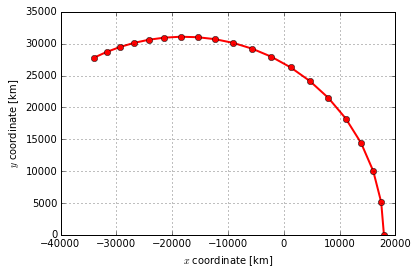

In [4]:
# Parameters
# Eccentricity
eps = 0.5
# Major semi-axis
a = 35900e3
# Gravitational constant
G = 6.67384e-11
# Earth Mass [kg]
Mz = 5.972e24

# Minor semi-axis
b = a*(1-eps**2.0)**0.5

# Constant in relation between Mean Anomaly and Time
const = ((G*Mz)/a**3.0)**0.5

tf = 5.0*3600.0
t0 = 0.
timestep = 15.0*60.

# Kepler equation
def Kepler( E ):
    return E - eps*np.sin(E) - const*t

def coordinates(E):
    x = a*(np.cos(E)-eps)
    y = b*np.sin(E)
    return [x/1.e3, y/1.e3]

times = np.arange(t0, tf, timestep)

position = []

a0 = -10
b0 = 10
Niter = 100

for t in times:
    E = Bisection(Kepler,a0,b0,Niter)
    ri = coordinates(E)
    position.append(ri)
    print "In %f hours, the satellite is located at (%f,%f) km"%(t/3600, ri[0], ri[1])

position = np.array(position)

# Plotting of the result
plt.plot(position[:,0],position[:,1],"o-",color="red",lw=2)
plt.grid(True)
plt.xlabel("$x$ coordinate [km]")
plt.ylabel("$y$ coordinate [km]")

## Iterace k pevnému bodu
Metoda bisekce je velmi jednoduchá pro implementaci a v mnoha případech je dostačující i přes relativně větší nároky na výpočetní čas. Přesto jsou různé patologické případy, kdy musíme použít jiné alternativní metody. Jednou z nich je následující metoda, jejíchž hlavní výhoda spočívá v tom, že nemusíme znát prohledávaný interval, namísto toho algoritmus sám konverguje požadovanému řešení.

## Princip metody

0. Přepíšeme naši funkci $f(x)$, pro kterou hledáme kořen do tvaru $$f(x)=x-g(x)$$
0. Zvolíme počáteční odhad řešení (hledaného kořenu) $k_1$
0. Budeme cyklicky opakovat následující sekvenci, pokud nebude rozdíl mezi po sobě jdoucími odhady kořene menší než požadovaná přesnost, nebo nepřesáhneme danný počet iterací.
    0. Další zpřesněný odhad řešení dostaneme ze vztahu $$k_{i+1}=g(k_i)$$
    0. Pokud je rozdíl mezi odhadem $k_{i+1}-k_i < \varepsilon$, nebo počet iterací přesáhnul maximální počet povolených ukončíme cyklus.

Vidíme, že hledání kořene dané funkce jsme převedli na hledání pevného bodu funkce

$$
x = g(x).
$$

**Problém: najděte kořen funkce**
$$
f(x) = \frac{x^2-1}{3}
$$

In [5]:
def f(x):
    return (x**2-1.0)/3.0
def g(x):
    return x - f(x)

def iterated_fixed_point(user_func,x_0 = 0.1, epsilon=0.001):
    MAX_ITER = 100
    eps = 10.*epsilon
    n = 0
    x = x_0
    while (eps > epsilon and n < MAX_ITER) :
        x_old = x
        x = user_func(x)
        eps = abs(x_old-x)
        n += 1
        print n,x
    return x

root = iterated_fixed_point(g)
print "Hledaný kořen je:",root

1 0.43
2 0.7017
3 0.870905703333
4 0.9514134553
5 0.983017600992
6 0.994243066372
7 0.998069974696
8 0.999355416566
9 0.999785000359
Hledaný kořen je: 0.999785000359


## Verhaulsteův diagram  (cobweb graf)

### Algoritmus 

0. Zvol počáteční odhad $x = x_0$.
0. Na ose vyznač bod o souřadnicích $(x,0)$.
0. Z něj nakresli vertikální čáru do bodu $(x,f(x))$.
0. Z tohoto bodu veď horizontální čáru do bodu $(f(x),f(x))$.
0. Pokračujeme vertikální čárou do bodu $(f(x),f(f(x)))$.
0. Body 4 a 5 opakujeme rekurzivně do předem daného počtu iterací.

In [6]:
# Plotting Verhaulst diagram

def get_VH_points( x_ini = 0.1, n = 20):
    x = x_ini
    VH_points = [(x,0)]
    for i in range(n):
        y1 = g(x)
        VH_points.append((x,y1))
        VH_points.append((y1,y1))
        y2 = g(y1)
        VH_points.append((y1,y2))
        x = y1
    
    return zip(*VH_points)

def get_functions_points(n_iter=10):
    x_vals = np.linspace(0,1.3,n_iter)
    y_vals = [g(x) for x in x_vals]
    return x_vals, y_vals

def plot_VH(function_n = 1000, VH_n = 10, VH_x = 0.1):
    func_x_vals,func_y_vals = get_functions_points(n_iter=function_n)
    VH_x_vals,VH_y_vals = get_VH_points(x_ini = VH_x, n = VH_n)
    
    fig, ax = plt.subplots(figsize = (6,6))
    diagonal_line = ax.plot((0,1.3), (0,1.3), color='gray', linewidth=1.35)
    function_line = ax.scatter(func_x_vals, func_y_vals, color = 'r', s=1.5)
    VH_line = ax.plot(VH_x_vals,VH_y_vals, color='b', linewidth=1)
    
    ax.set_ylim((0,1.3))
    ax.set_xlim((0,1.3))
    
    plt.show()
    return 

/Users/viktor/.virtualenvs/e-learn/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


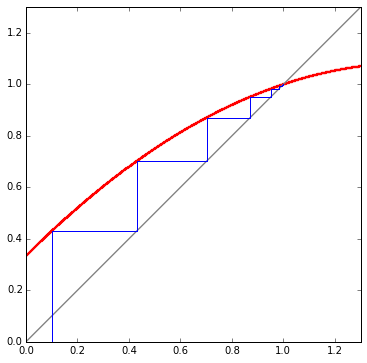

In [7]:
plot_VH()

Tomuto diskrétnímu, iterativnímu způsobu zobrazení se říka diskrétní mapa, lze jej formálně zapsat jako

$$
x_{n+1} = f(x_n)
$$

Pomocí diskrétních map lze popsat chování dynamických systémů. Můžeme si představit, že tak dostáváme informaci o systému v ekvidistantních diskrétních časových krocích. V určitých případech můžeme však při aplikaci tohoto způsobu na nelineární diskrétní mapy dostat velmi překvapivý výsledek. Jako vhodný příklad může posloužit [logistická rovnice](https://en.wikipedia.org/wiki/Logistic_map). 

$$
x_{n+1} = r x_{n}(x_{n}-1)
$$
Tato rovnice nám zjednodušeně popisuje vývoj populace, zahrnujíc dva podstatné efekty

* Populace vzrůstá rychleji, čím je větší
* Čím je větší populace, ubývá zdrojů a populace není schopna se uživit

Postup řešení bude stejný jako v předchozím případě, jenom zde ještě do funkce zahrneme jako parameter sílu zpětné vazby $r$. Uvidíme, že velikost tohoto parametru bude pro chování systému klíčové.

In [16]:
# Logistic equation
def logistic_map(x,r):
    return x*r*(1.0-x)

# Calculate points for Verhaulst diagram
def get_VH_points(r, x=0.5, n=100):
    # Points will be stored in tuple
    
    # Initialization and first point 
    VH_points  = [(x,0)]
    for i in range(n):
        y1 = logistic_map(x,r)
        VH_points.append((x,y1))
        VH_points.append((y1,y1))
        y2 = logistic_map(y1,r)
        VH_points.append((y1,y2))
        x = y1
    return zip(*VH_points)

# Calculate y-points from from logistic equation for x in range(0,1)
def get_function_points(r, n =1000):
    x_vals = np.linspace(0,1,n)
    y_vals = [logistic_map(x,r) for x in x_vals]
    return x_vals, y_vals


# Plotting VerhaulsteŮv diagram 
def plot_VH(r, function_n = 1000, VH_n = 100, VH_x = 0.5):
    func_x_vals, func_y_vals = get_function_points(r=r, n=function_n)
    VH_x_vals, VH_y_vals = get_VH_points(r=r, x = VH_x, n = VH_n)
    
    fig, ax = plt.subplots(figsize = (6,6))
    diagonal_line = ax.plot((0,1), (0,1), color='gray', linewidth=1.35)
    function_line = ax.scatter(func_x_vals,func_y_vals, color= 'r', edgecolor='None', s=1.5)
    VH_line = ax.plot(VH_x_vals,VH_y_vals, color='b', linewidth=1)
    
    ax.set_ylim((0,1))
    ax.set_xlim((0,1))
    
    plt.show()

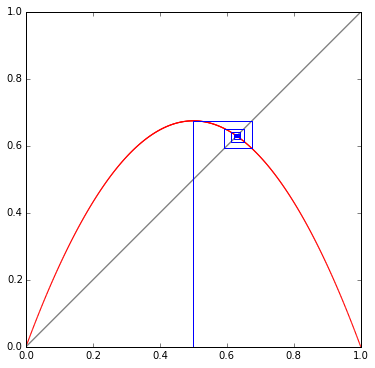

In [17]:
plot_VH(r=2.7)

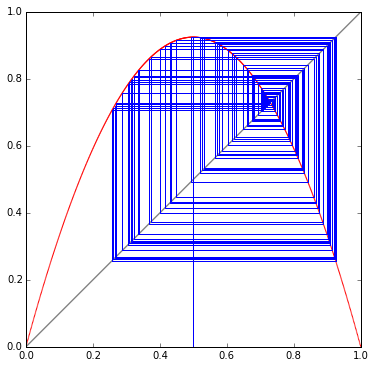

In [18]:
plot_VH(r=3.7)

Jak je patrné z předchozích grafů, v závislosti na parametru $r$ je hledaný pevný bod zobrazení stabilní (první případ) nebo nestabilní (druhý případ), což může vést až k chaotickému chování systému. 

### Úkoly

* Zkuste nalézt další případy nelineárních diskrétních map, vykazující zajimavé až chaotické chování
* Předchozí postup konstrukce Verhaulsteova diagramu zkuste přepracovat do formy interaktvní formy s využitím widgetů

## Iterace v komplexním oboru

Nemůžu si odpustit, když už jsme narazili na iterativní metody, nezmínit se o fraktálních množinách, které lze spatřit při studiu rychlosti konvergence map v komplexním oboru. Jaké muselo být asi překvapení prvních matematických průzkumníků těchto map, když pod jejich pláštíkem matematické rigoróznosti spatřili takřka dokonalý umělecký obraz nekonečné složitosti, rozmanitosti, jedinečnosti obalené estetickou dokonalostí. Zkusme si to také !

Poslouží nám k tomu opět kvadratická mapa, podobně jako v předchozích případech. Tentokrát ji však budeme analyzovat v komplexním oboru. Přesný tvar naší kvadratické mapy je

$$
z_{n+1} = z_n^2 + c
$$

kde $z,c$ jsou komplexní čísla. Otázka zní, pro jaké hodnoty čísla $c$ zůstává absolutní hodnota čísla $z_n$ ohraničena po daný počet iterací $n$. Problém lze znázornit graficky, zkoumanou rozsah velikosti komplexního čísla $c$ si můžeme znázornit čtvercem v komplexní rovině. Pro každý bod z této oblasti určíme, jak rychle diverguje jeho velikost resp. nediverguje po předem daný počet iterací. 

### Algoritmus výpočtu

* Určíme si prohledávanou oblast kompexního čísla $c$. Doporučený rozsah reálné složky $(0.22, -0.21)$ a imaginární složky $(-0.70, -0.69)$.
* Zvolíme maximální počet iterací a počáteční hodnotu $z_0$.
* Pro každou hodnotu komplexního čísla $c$ z prohledávané oblasti spočítáme iterativně kvadratickou mapu $z_{n+1}=f(z_n)$ a pokud během iterace velikost komplexního čísla překročí hodnotu $|z_n| > 2$, uložíme si hodnotu iterace $i$. Pokud tuto hodnotu nepřekročí, nebudeme tento bod považovat za divergentní.
* Této hodnotě pak přiřadíme určitou barvu, což nám ve výsledku generuje barevnou mapu pro celou prohledávanou oblast 

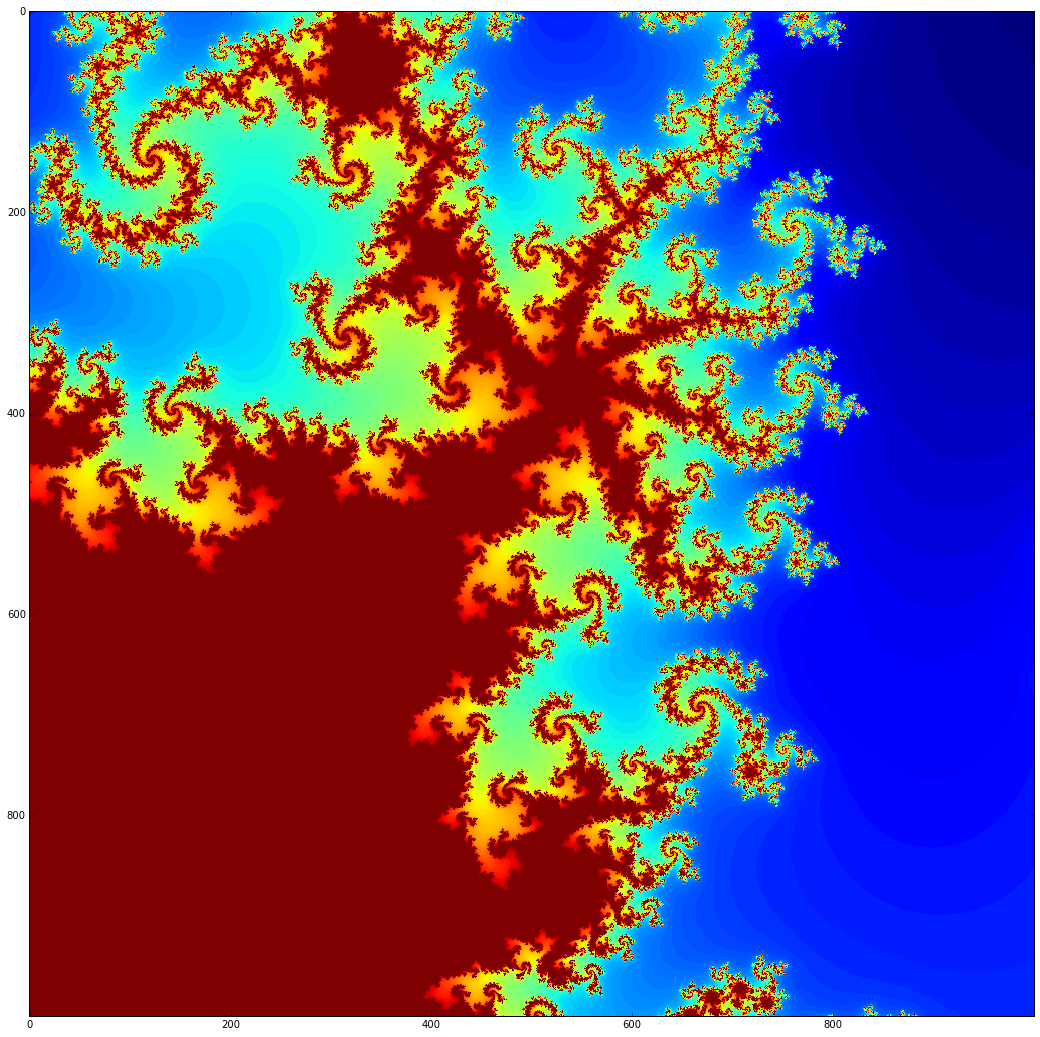

In [19]:
def mandel(c,maxiter):
    
    z = complex(0,0)
    
    for iteration in xrange(maxiter):
        z = (z*z) + c
        
        if abs(z) > 4:
            break
        
    return iteration

def make_plot(xvalues,yvalues):
    
    xlen = len(xvalues)
    ylen = len(yvalues)
    
    mapa = np.zeros((xlen,ylen))
    
    for ix in xrange(xlen):
        for iy in xrange(ylen):
            
            cx = xvalues[ix]
            cy = yvalues[iy]
            
            c = complex(cx, cy)

            mapa[ix,iy] = mandel(c,120)            
    return mapa

# set the location and size of the atlas rectangle
xvalues = np.linspace(-0.22, -0.21, 1000)
yvalues = np.linspace(-0.70, -0.69, 1000)

result = make_plot(xvalues,yvalues)

fig, ax = plt.subplots(figsize=(18, 18))

ax.imshow(result, interpolation="nearest")

Výsledný obraz zobrazuje podivuhodný geometrický obrazec, který v každém bodě obsahuje svoji kopii, je soběpodobný a má neceločíselnou dimenzi. Poprvé spatřil tento fraktál [Mandelbrotova množina](https://en.wikipedia.org/wiki/Mandelbrot_set) světlo světa v roce 1978. Pro své vlastnosti se jim souhrně říká fraktály a velmi úzce souvisí s chaotickými systémy.

### Příklady
* Modifikujte komplexní kvadratickou mapu, rozsah prohledávané oblasti komplexního čísla $c$ a generujte jiné tvary fraktálu.
* Zkuste výpočet optimalizovat a zefektivnit dobu výpočtu, porovnejte si výsledné časy výpočtu
* Vytvořte animaci zoomu výpočetní oblasti fraktální množiny

# Integrace funkce $\int{f(x)} {\rm d}x$